# Model Training
This script is used for training the LightGBM model. All feature engineering was done previously in SAS.

In [1]:
import numpy as np
import lightgbm as lgbm
import pandas as pd
import os

In [4]:
'''
Ignore the annoying copy warnings from pandas
'''
import warnings
warnings.filterwarnings('ignore')

In [2]:
'''
File paths
'''
folder = os.path.join("/projectnb","cs542sp","netflix_wrw2", "CS542-final-project", "data")

In [3]:
from sklearn.model_selection import train_test_split

'''
Process the raw data into trainable data for the model
 - creates a train and validation set
'''
def process_data(data):
    
    data = data.dropna()
    
    for c in data.columns:
        data.loc[:,c] = pd.to_numeric(data.loc[:,c], downcast="unsigned")

    data.info()
    
    X = data.drop(['User_ID','Movie_ID', 'Rated'], axis=1)
    Y = data.loc[:,"Rated"]

    X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size = 0.25, random_state = 0)
    
    return X_train, X_valid, y_train, y_valid


In [5]:
%%time

'''
Read 50M data instances and process into useable data
'''

reader = pd.read_sas('netflix_analysis_dataset2.sas7bdat', chunksize=50_000_000)
data = next(reader)

X_train, X_valid, y_train, y_valid = process_data(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000000 entries, 0 to 49999999
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   User_ID                 float64
 1   Movie_ID                float64
 2   Year                    float64
 3   Rated                   float64
 4   Ratings_for_Movie       float64
 5   Ratings_for_Movie_2005  float64
 6   Netflix_Release_Year    float64
 7   Movie_Rating_Time       float64
 8   Movie_Ratings_per_Day   float64
 9   Release_Year            float64
 10  AVG_Rating_for_Movie    float64
 11  Ratings_from_User       float64
 12  Ratings_from_User_2005  float64
 13  AVG_Rating_from_User    float64
 14  User_Rating_Time        float64
 15  User_Ratings_per_Day    float64
 16  User_Entry_Year         float64
dtypes: float64(17)
memory usage: 6.3 GB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 49371488 entries, 0 to 49999999
Data columns (total 17 columns):
 #   Column               

### Note the number of threads should be set to the number of CPUs available for training.

In [ ]:
# set the number of threads to use in training
num_threads = 8

# set the number of training rounds
num_rounds = 1000

In [7]:
%%time

'''
Set the data
'''
train_data = lgbm.Dataset(X_train, label=y_train, free_raw_data = False)
valid_set = lgbm.Dataset(X_valid, label=y_valid, reference=train_data, free_raw_data = False)

'''
Set the parameters
'''
params = {
    "objective":'binary',
    "num_leaves": 2047,
    "max_depth": 12,
    "learning_rate": 0.1,
    "bagging_fraction": 0.7,
    "bagging_freq": 5,
    "metric":"binary_logloss",
    "num_threads": num_threads,
    "boosting": "gbdt",
    "min_data_in_leaf":500,
    "verbose":-1
}


model = lgbm.train(
    params,
    train_data,
    num_boost_round=num_rounds,
    valid_sets=[valid_set],
    early_stopping_rounds = 10,
    verbose_eval = 10,
)

[LightGBM] [Info] Number of positive: 15304359, number of negative: 21724257
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.264111 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2661
[LightGBM] [Info] Number of data points in the train set: 37028616, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.413312 -> initscore=-0.350292
[LightGBM] [Info] Start training from score -0.350292
Training until validation scores don't improve for 10 rounds
[10]	valid_0's binary_logloss: 0.639096
[20]	valid_0's binary_logloss: 0.630269
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[30]	valid_0's binary_logloss: 0.626752
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[130]	valid_0's binary_logloss: 0.618189
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[230]	valid_0's binary_logloss: 0.613973
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[240]	valid_0's binary_logloss: 0.613612
[LightGBM] [Warnin

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[340]	valid_0's binary_logloss: 0.610544
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[440]	valid_0's binary_logloss: 0.607914
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

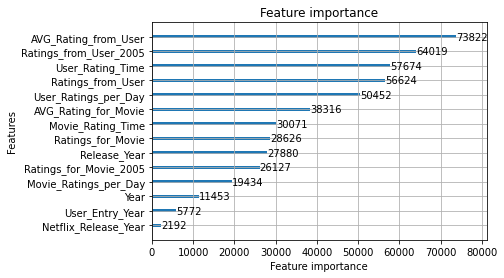

In [8]:
'''
Plot the feature importance of the model
'''
lgbm.plot_importance(model)

In [9]:
from sklearn.metrics import accuracy_score

'''
Evaluate the model train and valid set score

Returns the valid set predictions
'''
def evaluate(model, X_train, X_valid, y_train, y_valid, num = 1_000_000):
    
    train_index = y_train.sample(num).index
    test_index = y_valid.sample(num).index
    
    train_prediction = model.predict(X_train.loc[train_index])
    valid_prediction = model.predict(X_valid.loc[test_index])
    
    train = accuracy_score(y_train.loc[train_index], train_prediction > 0.5)
    test = accuracy_score(y_valid.loc[test_index], valid_prediction > 0.5)
    
    '''
    Check for overfitting
    '''
    print('\tTrain score:\t{:.3f}'.format(train))
    print('\tTest score:\t{:.3f}'.format(test))
    
    return test_prediction

In [10]:
evaluate(model,X_train, X_valid, y_train, y_valid, num=10_000)

	Train score:	0.680
	Test score:	0.671


(0.6799, 0.6709)

In [12]:
'''
Metrics report from sklearn
'''
from sklearn.metrics import classification_report

test_index = y_valid.sample(100000).index

valid_prediction = model.predict(X_valid.loc[test_index])

print(classification_report(y_valid[test_index], valid_prediction > 0.5))

              precision    recall  f1-score   support

           0       0.68      0.81      0.74     58656
           1       0.63      0.45      0.53     41344

    accuracy                           0.66    100000
   macro avg       0.65      0.63      0.63    100000
weighted avg       0.66      0.66      0.65    100000



In [17]:
'''
Save the model to the models folder
'''
model.save_model('models/m50M_1K.txt')